In [1]:
#from pycocotools.coco import COCO
import glob
import _init_paths
from fast_rcnn.config import cfg
from fast_rcnn.test import im_detect
from fast_rcnn.nms_wrapper import nms
from utils.timer import Timer
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio
import caffe, os, sys, cv2
import argparse
from fast_rcnn.config import cfg, cfg_from_file, cfg_from_list
from datasets.config import CLASS_SETS
from datasets.vatic_hierarchy import VaticData
import random
from scipy.misc import imread

In [2]:
MAIN_CLASSES = CLASS_SETS['coco']
SUB_CLASSES = CLASS_SETS['vehicle-types']

In [3]:
mapper = {"van":"car", "trailer-head":"truck",\
              "sedan/suv":"car", "scooter":"motorcycle", "bike":"bicycle", "pickup": "car"}  

In [4]:
A = VaticData("van", MAIN_CLASSES, SUB_CLASSES, CLS_mapper=mapper)

Meta data path: /root/data/data-van/meta.json does not exist. Use Default meta data
{'test': {'start': None, 'sets': [1], 'end': None, 'stride': 30}, 'train': {'start': None, 'sets': [0], 'end': None, 'stride': 1}, 'format': 'jpg'}
Total: 4104 images


In [4]:
def show_statistic(imdb, MAIN_CLASSES, SUB_CLASSES):
    
    gts = imdb.gt_roidb()
    statistic = {'length': len(gts), "main":{}, "sub":{} }
   
    
    for gt in gts:
        for i, bbox in enumerate(gt['boxes']):          
            main_cls_idx = gt['gt_classes'][i]
            main_label = MAIN_CLASSES[main_cls_idx]
            statistic["main"][main_label] = statistic["main"].get(main_label, 0 ) + 1
            sub_cls_idx = gt['sub_gt_classes'][i]
            sub_label = SUB_CLASSES[sub_cls_idx]
            statistic["sub"][sub_label] = statistic["sub"].get(sub_label, 0 ) + 1
    return statistic
            



def viz_vaitc(vatic, length, K=5):
    gts = vatic.gt_roidb()
    edgecolor = "green"
    for i in range(K):
        idx = random.randint(0, length)
        img_path = vatic.image_path_at(idx)
        img = imread(img_path)
        gt = gts[idx]
        fig, ax = plt.subplots(figsize=(6, 6))
        plt.imshow(img)
        
        for i, bbox in enumerate(gt['boxes']):
          
            main_cls_idx = gt['gt_classes'][i]
            main_label = MAIN_CLASSES[main_cls_idx]
            sub_cls_idx = gt['sub_gt_classes'][i]
            sub_label = SUB_CLASSES[sub_cls_idx]
            if sub_label == "not-target" or sub_label == "empty":
                sub_label = ""
                    
            ax.add_patch(
                plt.Rectangle((bbox[0], bbox[1]),
                              bbox[2] - bbox[0],
                              bbox[3] - bbox[1], fill=False,
                              edgecolor=edgecolor, linewidth=3.5)
                )
            ax.text(bbox[0], bbox[1] - 2,
                    '{:s} {:s}'.format(main_label, sub_label),
                    bbox=dict(facecolor='blue', alpha=0.5),
                    fontsize=14, color='white')

       
            
        plt.show()
    

In [11]:
def viz_vaitc(vatic, length, K=5):
    gts = vatic.gt_roidb()
    edgecolor = "green"
    for i in range(K):
        idx = random.randint(0, length)
        img_path = vatic.image_path_at(idx)
        img = imread(img_path)
        gt = gts[idx]
        fig, ax = plt.subplots(figsize=(6, 6))
        plt.imshow(img)
        
        for i, bbox in enumerate(gt['boxes']):
          
            main_cls_idx = gt['gt_classes'][i]
            main_label = MAIN_CLASSES[main_cls_idx]
            
           
                    
            ax.add_patch(
                plt.Rectangle((bbox[0], bbox[1]),
                              bbox[2] - bbox[0],
                              bbox[3] - bbox[1], fill=False,
                              edgecolor=edgecolor, linewidth=3.5)
                )
            ax.text(bbox[0], bbox[1] - 2,
                    '{:s}'.format(main_label),
         PU_Van           bbox=dict(facecolor='blue', alpha=0.5),
                    fontsize=14, color='white')

       
            
        plt.show()
    

In [6]:
statistic = show_statistic(A, MAIN_CLASSES, SUB_CLASSES)

In [7]:
statistic

{'length': 4104,
 'main': {u'car': 10380, u'person': 3305},
 'sub': {'not-target': 3305, 'van': 10380}}

Meta data path: /root/data/data-PU_Van/meta.json does not exist. Use Default meta data
{'test': {'start': None, 'sets': [1], 'end': None, 'stride': 30}, 'train': {'start': None, 'sets': [0], 'end': None, 'stride': 1}, 'format': 'jpg'}
Total: 841 images


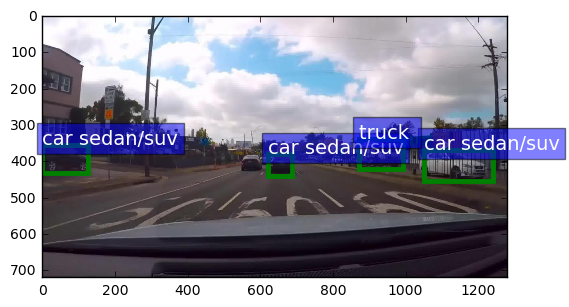

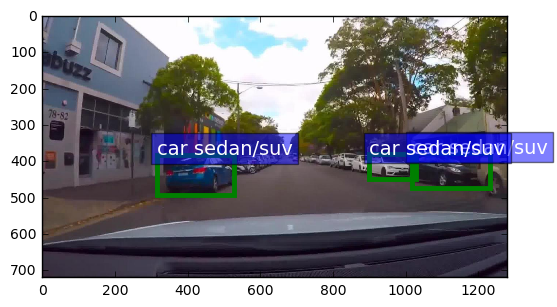

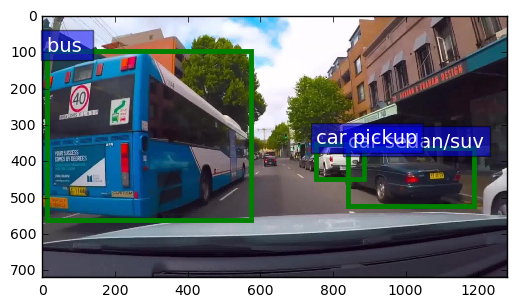

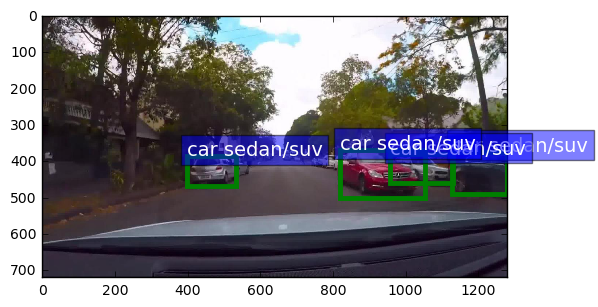

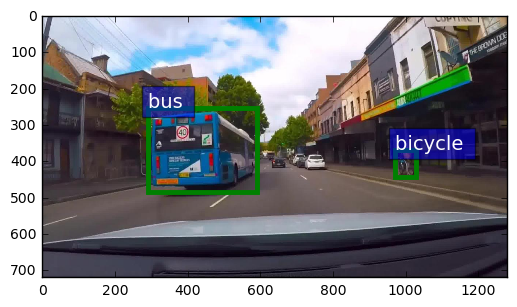

In [9]:

vatic = VaticData("PU_Van", MAIN_CLASSES,SUB_CLASSES, CLS_mapper=mapper)
viz_vaitc(vatic, len(vatic.gt_roidb())-1)

Meta data path: /root/data/data-fire/meta.json does not exist. Use Default meta data
{'test': {'start': None, 'sets': [1], 'end': None, 'stride': 30}, 'train': {'start': None, 'sets': [0], 'end': None, 'stride': 1}, 'format': 'jpg'}
Total: 7387 images


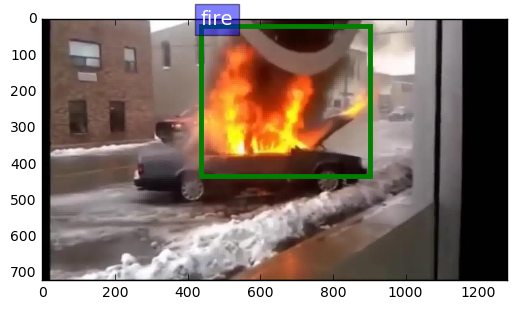

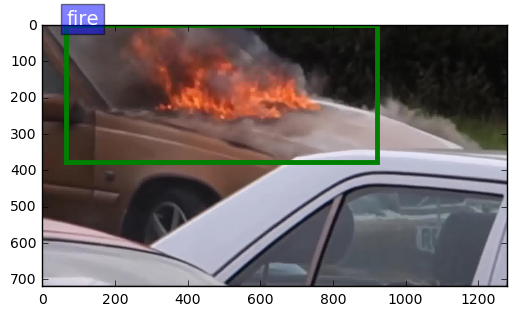

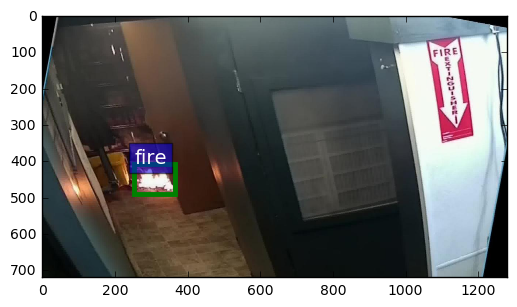

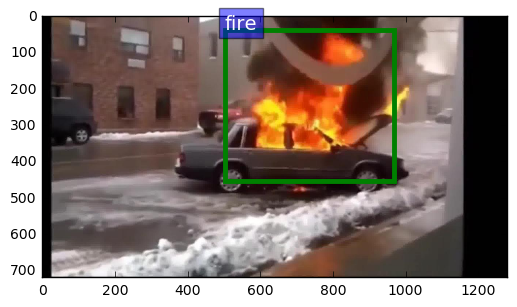

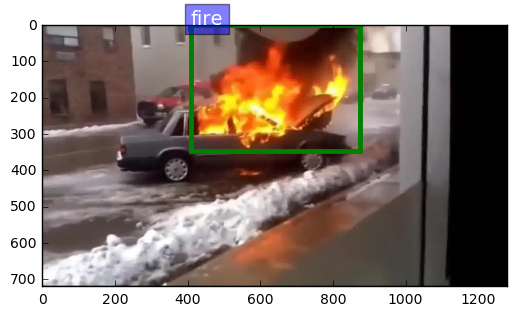

In [16]:

vatic = VaticData("", MAIN_CLASSES, CLS_mapper=CLS_mapper)
viz_vaitc(vatic, len(vatic.gt_roidb())-1)

In [ ]:
random.randint(0,2)